# dc

In [1]:
library(Seurat)
library(pheatmap)
library(purrr)
library(dplyr)
library(stringr)
library(harmony)

Attaching SeuratObject


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：Rcpp



In [2]:
top_genes = function(degs){
    rownames(degs) = NULL
    for (cluster in unique(degs$cluster)){
        message(cluster)
        print(degs[degs$cluster == cluster,] %>% arrange(desc(avg_log2FC)) %>% head(n=50))
    } 
}

In [3]:
dc = readRDS('~/HPV/res/public_rna/seurat_rds/annotated/dc.rds')

In [4]:
Idents(dc) = dc$minor
degs = FindAllMarkers(dc,logfc.threshold = 0.25,return.thresh = 0.05)

Calculating cluster cDC1

Calculating cluster cDC2

Calculating cluster cDCmig



In [5]:
top_genes(degs)

cDC1



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster      gene
1  5.913363e-32   3.311099 0.985 0.680 1.125845e-27    cDC1     WDFY4
2  1.720889e-27   2.758171 0.773 0.192 3.276400e-23    cDC1      CLNK
3  7.393600e-52   2.749798 0.864 0.095 1.407667e-47    cDC1     CADM1
4  5.234853e-28   2.639677 0.924 0.558 9.966637e-24    cDC1      CPVL
5  7.032195e-13   2.448951 0.864 0.675 1.338860e-08    cDC1    CCSER1
6  8.746671e-33   2.308088 0.924 0.373 1.665279e-28    cDC1   C1orf54
7  4.286034e-49   2.265273 0.833 0.090 8.160180e-45    cDC1     RAB7B
8  7.037958e-14   2.239358 0.924 0.678 1.339957e-09    cDC1     HDAC9
9  1.322646e-15   2.215944 0.909 0.506 2.518186e-11    cDC1    CAMK2D
10 9.424762e-70   2.176955 0.758 0.008 1.794380e-65    cDC1    CLEC9A
11 1.770597e-18   2.169074 0.652 0.199 3.371040e-14    cDC1     NEGR1
12 1.779328e-26   2.110970 0.970 0.586 3.387663e-22    cDC1      IRF8
13 2.098887e-13   2.106591 0.879 0.591 3.996070e-09    cDC1     RUNX1
14 1.299181e-30   2.

cDC2



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster     gene
1  8.090230e-24   2.743343 0.528 0.074 1.540299e-19    cDC2     C1QB
2  2.722420e-23   2.612153 0.514 0.069 5.183216e-19    cDC2     C1QA
3  3.998349e-38   2.424119 0.929 0.423 7.612457e-34    cDC2   PLXDC2
4  7.005615e-38   2.380690 0.826 0.371 1.333799e-33    cDC2   FCER1G
5  1.008606e-41   2.291972 0.762 0.097 1.920286e-37    cDC2  ALOX5AP
6  5.773223e-33   2.197629 0.826 0.343 1.099164e-28    cDC2    DOCK4
7  1.740668e-24   2.137357 0.649 0.189 3.314058e-20    cDC2     IL1B
8  1.969895e-51   2.108141 0.862 0.149 3.750483e-47    cDC2    IGSF6
9  7.435714e-45   2.092508 0.844 0.183 1.415686e-40    cDC2   MS4A6A
10 4.047512e-20   2.057500 0.461 0.063 7.706057e-16    cDC2     C1QC
11 9.353053e-42   1.931364 0.943 0.491 1.780728e-37    cDC2     AIF1
12 1.896308e-16   1.919769 0.599 0.246 3.610381e-12    cDC2   ZNF331
13 2.186189e-52   1.877871 0.791 0.006 4.162285e-48    cDC2     CYBB
14 9.920310e-40   1.876892 0.741 0

cDCmig



          p_val avg_log2FC pct.1 pct.2    p_val_adj cluster       gene
1  4.126987e-55   3.758143 1.000 0.517 7.857371e-51  cDCmig      BIRC3
2  1.428292e-61   3.626626 0.734 0.023 2.719324e-57  cDCmig      CCL19
3  2.050299e-53   3.379600 0.752 0.075 3.903564e-49  cDCmig       GPC5
4  2.864197e-36   3.154762 0.661 0.092 5.453145e-32  cDCmig      CCL17
5  3.014443e-40   3.087164 0.798 0.210 5.739198e-36  cDCmig      CCL22
6  3.647151e-59   2.860695 0.991 0.279 6.943812e-55  cDCmig      FSCN1
7  5.311415e-52   2.828186 0.771 0.092 1.011240e-47  cDCmig      ENOX1
8  6.627425e-39   2.823026 0.972 0.891 1.261795e-34  cDCmig        TXN
9  2.365250e-43   2.786233 0.761 0.144 4.503200e-39  cDCmig      WNT5B
10 5.000823e-40   2.737570 0.826 0.241 9.521067e-36  cDCmig    L3MBTL4
11 8.304514e-51   2.692868 0.954 0.296 1.581096e-46  cDCmig       CCR7
12 4.910429e-41   2.664739 0.936 0.618 9.348965e-37  cDCmig      KIF2A
13 4.079827e-55   2.638563 0.771 0.072 7.767583e-51  cDCmig     LIMCH1
14 9.2

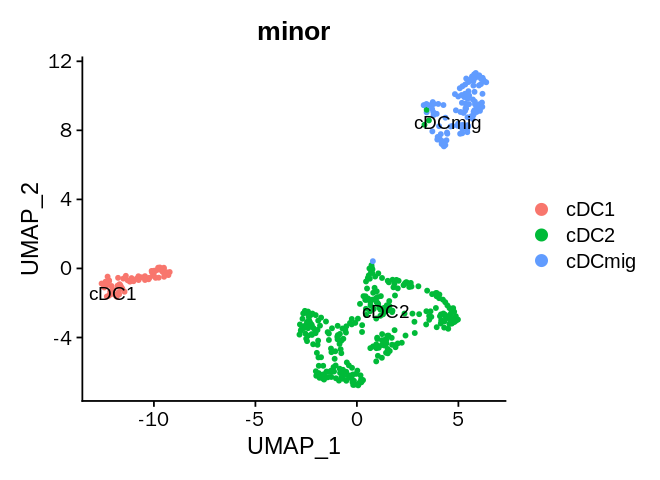

In [6]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(dc, group.by = 'minor', label = TRUE,repel = TRUE)

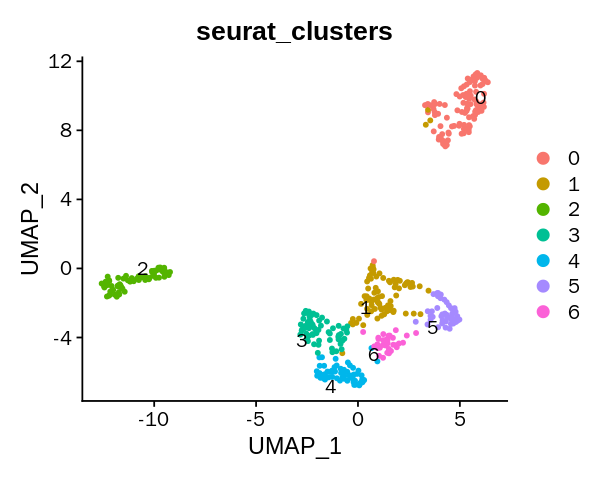

In [7]:
options(repr.plot.width = 5, repr.plot.height = 4)
DimPlot(dc, group.by = 'seurat_clusters', label = TRUE,repel = TRUE)

In [8]:
unique(dc$minor)

[1] "cDC1"   "cDC2"   "cDCmig"

In [9]:
dc$curated = dc$minor
dc$curated[dc$seurat_clusters %in% c(1,6,5) ] = 'cDC2_CD1C'
dc$curated[dc$seurat_clusters %in% c(4) ] = 'MonoDC_FCGR3A'
dc$curated[dc$seurat_clusters %in% c(3) ] = 'MonoDC_CD14'
dc$curated[dc$curated == 'cDC1'] = 'cDC1_CLEC9A'
dc$curated[dc$curated == 'cDCmig'] = 'cDC_LAMP3'

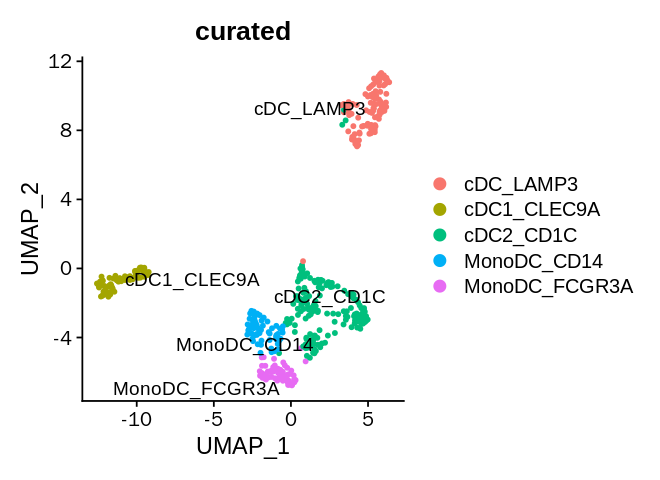

In [10]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
DimPlot(dc, group.by = 'curated', label = TRUE,repel = TRUE)

In [11]:
saveRDS(dc,file = '~/HPV/res/public_rna/seurat_rds/annotated/dc.rds')